In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor


In [2]:
def random_forest(df):
    f_select=[]
   
    X = df.drop('win',1)
    y = df['win'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    proba = np.around(proba, decimals=2)


    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    # feature importanti per determinarlo
    feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print('Feature importance:\n', feature_imp)
    f_selection=feature_imp[(feature_imp>0)]
    print('Feature selection:\n',f_selection)
            
        
    # Creating a bar plot
    sns.barplot(x=f_selection, y=f_selection.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()
    #return X_test, y_test, y_pred, proba


In [3]:
def boruta(df):
    X = df.drop('win',1)
    y = df['win'].values
    ###initialize Boruta
    forest = RandomForestRegressor(
       n_jobs = -1, 
       max_depth = 5
    )
    boruta = BorutaPy(
       estimator = forest, 
       n_estimators = 'auto',
       max_iter = 100 # number of trials to perform
    )
    ### fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X), np.array(y))
    ### print results
    green_area = X.columns[boruta.support_].to_list()
    blue_area = X.columns[boruta.support_weak_].to_list()
    print('features in the green area:', green_area)
    print('features in the blue area:', blue_area)

In [4]:
df=pd.read_csv('../docs/csv/csvscenarioJunctionExo.csv',index_col=0)

In [5]:
c=df.select_dtypes(include='object').columns
for i in c.array:
    value=df[i].unique()
    le = preprocessing.LabelEncoder()
    le.fit(value)
    df[i]=le.transform(df[i])
    

[[35  1]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        46

   micro avg       0.99      0.99      0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82

Accuracy: 0.9878048780487805
Feature importance:
 positionX_red_rInf4              0.074609
positionX_blue_bAPC1             0.074055
positionZ_blue_bAPC1             0.069603
killed_red_rInf4                 0.064546
positionY_red_rTank3             0.052964
positionZ_blue_bExo2             0.051769
hp_red_rInf4                     0.044080
positionX_blue_bExo2             0.043575
weapon MGbluebExo1               0.041393
positionZ_red_rTank3             0.036174
positionX_red_rTank3             0.029976
positionZ_red_rInf4              0.021957
positionZ_red_rInf3              0.021878
positionY_red_rInf3              0.020712
weapon MTredrInf

No handles with labels found to put in legend.


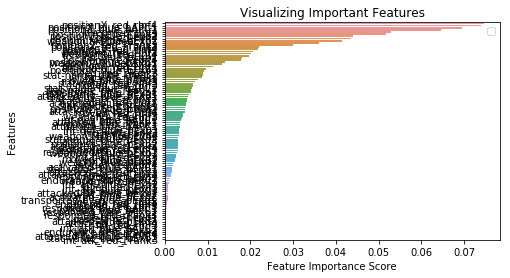

In [6]:
random_forest(df)

In [7]:
boruta(df)

features in the green area: ['positionX_red_rTank3', 'positionY_red_rTank3', 'positionZ_red_rTank3', 'positionZ_red_rInf3', 'hp_red_rInf4', 'killed_red_rInf4', 'positionY_red_rInf4', 'weapon MTredrInf4', 'positionZ_blue_bAPC1']
features in the blue area: []


In [ ]:
LinearSVM

In [ ]:
Naive Bayes